<a href="https://colab.research.google.com/github/Clairekmkim/Clairekmkim/blob/main/boston_housing_tree_bagging_randomforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

17.602204873990754
14.551381714144748
16.591786069940184


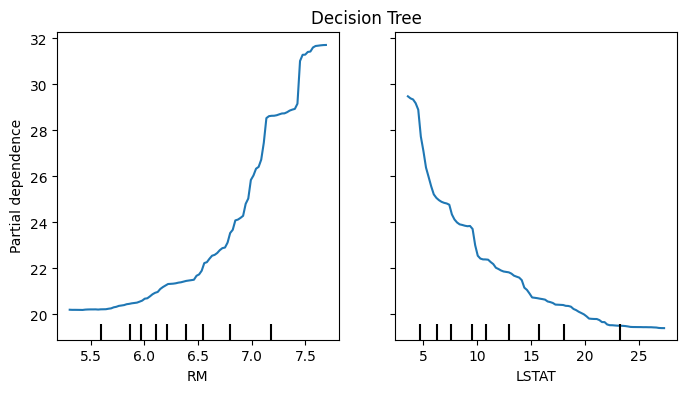

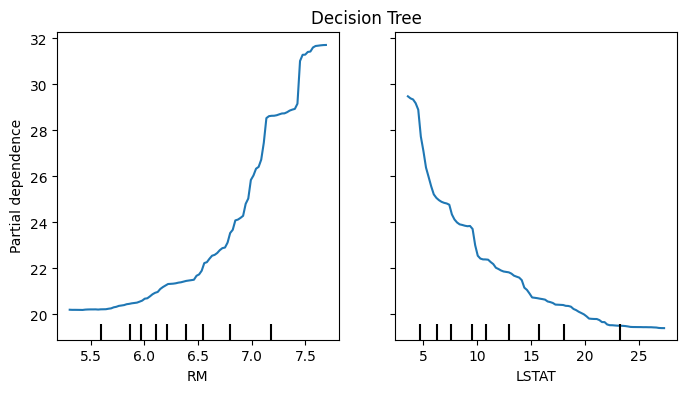

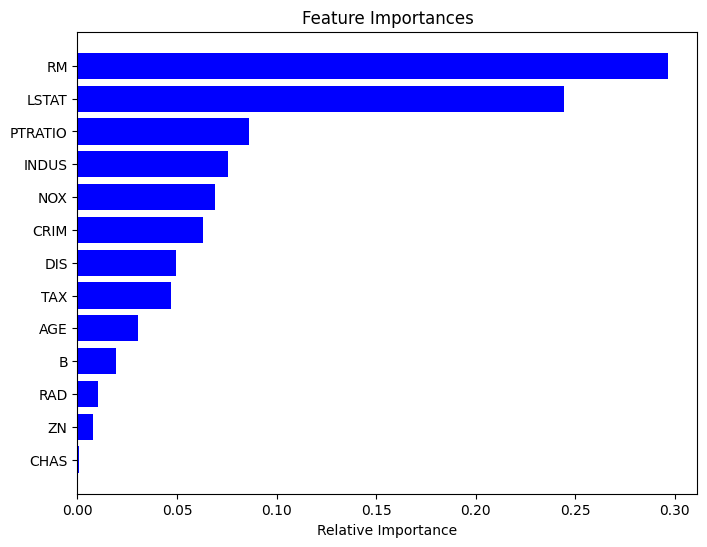

'\nBoston Housing Dataset Variables Description:\n- CRIM: Crime rate - Higher values indicate higher crime rates in the area\n- ZN: Zoning - Proportion of residential land zoned for large lots\n- INDUS: Industry - Proportion of non-retail business acres\n- CHAS: Charles River - 1 if property bounds the river, 0 otherwise\n- NOX: Nitric Oxide - Levels of nitric oxide pollution\n- RM: Rooms - Average number of rooms per house (key indicator of house size)\n- AGE: Age - Proportion of old houses (built before 1940)\n- DIS: Distance - How far from key employment centers\n- RAD: Accessibility - How accessible to highways\n- TAX: Tax Rate - Property tax rate\n- PTRATIO: Pupil-Teacher Ratio - School quality indicator\n- B: Black proportion - Indicator of the percentage of Black residents\n- LSTAT: Lower Status - Percentage of lower-status population\n\nThe partial dependence plot shows how two key features affect house prices:\n1. RM (Rooms): More rooms typically indicate larger houses and hig

In [14]:
# Import necessary libraries and packages
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical operations
import os           # For operating system operations
import matplotlib.pyplot as plt  # For creating visualizations
from sklearn.inspection import PartialDependenceDisplay  # For plotting partial dependence

# Import boston dataset directly from source
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Import train-test split function and other required modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor

# Create feature names for Boston dataset
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
                'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

# Create feature dataframe (X) using data and feature names
X_boston = pd.DataFrame(data, columns=feature_names)

# Create target dataframe (y) with house prices
y_boston = target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = \
    train_test_split(X_boston, y_boston,
                    test_size = 0.3, random_state=123)

# Create and train Decision Tree model
tree = DecisionTreeRegressor(max_depth = 5,
                           random_state = 0)
tree.fit(X_train, y_train)

# Make predictions and calculate MSE for Decision Tree
tree_pred = tree.predict(X_test)
mse = np.mean(np.power(y_test - tree_pred, 2))
print(mse)  # Should output approximately 17.60 (RMSE ≈ 4.2)

# Create and train Bagging model
tree = DecisionTreeRegressor()
bag_model = BaggingRegressor(tree, n_estimators=1000,
                            max_samples=0.8, random_state=1)
bag_model.fit(X_train, y_train)

# Make predictions and calculate MSE for Bagging
bag_pred = bag_model.predict(X_test)
print(np.mean(np.power(y_test - bag_pred, 2)))  # Should output approximately 14.55

# Create and train Random Forest model
rf_model = RandomForestRegressor(n_estimators = 1000,     # Number of trees in the forest
                               max_features = 3,          # Max features for each split
                               min_samples_leaf = 3)      # Min samples per leaf
rf_model.fit(X_train, y_train)

# Make predictions and calculate MSE for Random Forest
rf_pred = rf_model.predict(X_test)                      # Generate predictions
print(np.mean(np.power(y_test - rf_pred, 2)))           # Should output approximately 16.30

# Create partial dependence plot for Random Forest model
fig, ax = plt.subplots(figsize=(8, 4))                  # Create figure with specific size
ax.set_title("Decision Tree", fontsize=12)              # Set plot title and font size
# Create partial dependence plot for RM and LSTAT features
display = PartialDependenceDisplay.from_estimator(rf_model, X_train, ["RM","LSTAT"], ax=ax)
plt.show()                                              # Display the plot

# Create partial dependence plot for Random Forest model
fig, ax = plt.subplots(figsize=(8, 4))                  # Create figure with specific size
ax.set_title("Decision Tree", fontsize=12)              # Set plot title and font size
# Create partial dependence plot for RM and LSTAT features
display = PartialDependenceDisplay.from_estimator(rf_model, X_train, ["RM","LSTAT"], ax=ax)
plt.show()                                              # Display the plot

# Get feature importances from Random Forest model
importances = rf_model.feature_importances_            # Extract feature importance values
indices = np.argsort(importances)                      # Get sorted indices of importances

# Create feature importance plot
plt.figure(figsize=(8, 6))                            # Create new figure with specific size
plt.title('Feature Importances')                      # Set plot title
plt.barh(range(len(indices)),                         # Create horizontal bar plot
         importances[indices],                        # Use sorted importance values
         color='b',                                   # Set bar color to blue
         align='center')                              # Center align the bars
plt.yticks(range(len(indices)),                       # Set y-axis ticks
           [feature_names[i] for i in indices])       # Use feature names as tick labels
plt.xlabel('Relative Importance')                     # Set x-axis label
plt.show()                                           # Display the plot

"""
Boston Housing Dataset Variables Description:
- CRIM: Crime rate - Higher values indicate higher crime rates in the area
- ZN: Zoning - Proportion of residential land zoned for large lots
- INDUS: Industry - Proportion of non-retail business acres
- CHAS: Charles River - 1 if property bounds the river, 0 otherwise
- NOX: Nitric Oxide - Levels of nitric oxide pollution
- RM: Rooms - Average number of rooms per house (key indicator of house size)
- AGE: Age - Proportion of old houses (built before 1940)
- DIS: Distance - How far from key employment centers
- RAD: Accessibility - How accessible to highways
- TAX: Tax Rate - Property tax rate
- PTRATIO: Pupil-Teacher Ratio - School quality indicator
- B: Black proportion - Indicator of the percentage of Black residents
- LSTAT: Lower Status - Percentage of lower-status population

The partial dependence plot shows how two key features affect house prices:
1. RM (Rooms): More rooms typically indicate larger houses and higher prices
2. LSTAT (Lower Status): Higher percentage typically indicates lower house prices
"""

17.602204873990754
14.551381714144748
16.327249442495454
